<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab09_Matrices_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrices

1. **Modelo de encriptación**

Un proceso para encriptar un mensaje secreto es usar cierta matrix cuadrada cuyos elementos son enteros con elementos enteros en la inversa. Se recibe un mensaje, se asigna un número a cada letra Por ejemplo, A=1, B=2, C=3, ... etc y espacio=27), se arreglan los números en una matriz de izquierda a derecha en cada fila, donde el número de elementos en la fila es igual al tamaño de la matriz de código, se multiplica esa matriz por la matriz de código por la derecha, se transcribe el mensaje en una cadena de números y se manda el mensaje.

La persona que debe recibir el mensaje conoce la matriz de código. El o ella arrglan el mensaje encriptado en una matriz de izquierda a derecha en cada fila, en donde el número de elementos en una fila conicide con el tamaño de la matriz de código multiplicada por la derecha, por el inverso de la matriz de código y puede leer mensaje decodificado.

Usted a recibido el siguiente mensaje que fue encriptado usando la matriz A. Decodifiquelo.

```
matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
```

Mensaje

47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588,

la primera fila del mensaje es 47,49,-19,257,487

¿Cual es el mensaje?



In [ ]:
import numpy as np

In [ ]:
def inversa(A):
  """
  Encuentra la matriz inversa de A.

  Args:
    A: Una matriz cuadrada.

  Returns:
    La matriz inversa de A.
  """

  n = len(A)
  A = A.astype(int)
  for i in range(n):
    if A[i, i] == 0:
      for j in range(i + 1, n):
        if A[j, i] != 0:
          A[[i, j]] = A[[j, i]]
          break
    for j in range(n):
      if i != j:
        A[j, :] = A[j, :] - A[j, i] / A[i, i] * A[i, :]
  for i in range(n - 1, -1, -1):
    for j in range(i + 1, n):
      A[i, :] = A[i, :] - A[i, j] / A[j, j] * A[j, :]
  for i in range(n):
    A[i, :] = A[i, :] / A[i, i]
  return A


In [ ]:
A = np.array([[1, 2, -3, 4, 5],
              [-2, -5, 8, -8, -9],
              [1, 2, -2, 7, 9],
              [1, 1, 0, 6, 12],
              [2, 4, -6, 8, 11]])

A_inversa = inversa(A)

def descifrar(A, mensaje):
  """
  Descifra el mensaje usando la matriz A.

  Args:
    A: La matriz de código.
    mensaje: El mensaje encriptado.

  Returns:
    El mensaje descifrado.
  """

  n = len(A)
  mensaje_descifrado = []
  for i in range(0, len(mensaje), n):
    bloque_encriptado = mensaje[i:i + n]
    bloque_descifrado = A_inversa @ bloque_encriptado.reshape(n, 1)
    mensaje_descifrado.append(bloque_descifrado.reshape(-1))
  return mensaje_descifrado
# Mensaje encriptado
mensaje =np.array([
        [47, 49, -19, 257, 487],
    [10, -9, 63, 137, 236],
    [79, 142, -184, 372, 536],
    [59, 70, -40, 332, 588]
])

# Verifique si la longitud del arreglo mensaje es un múltiplo del número de columnas en la matriz A
if len(mensaje) % A.shape[1] != 0:
    # Rellene el arreglo mensaje con ceros en la última columna
    mensaje_paddeado = np.pad(mensaje, ((0, 0), (0, 1)))

In [ ]:
mensaje_descifrado = descifrar(A, mensaje_paddeado)

ValueError: ignored

2. Operaciones matricial con regresión lineal.

Cuando se desea hacer una regresión lineal multivariada, existen diferentes formas de realizar la regresión, una de ellas es encontrar el error cuadrático medio y miniminzar el conjunto de parámetros de la regresión emplando algún metodo de minimización, otra forma es encontrar la expresión analítica en forma matricial, para determinar el conjunto de parámetros de la regresión. En este último caso, la regresión lineal viene dada por la siguiente expresion generalizada:


- $\Theta = (X^T X)^{-1} X^T y$

donte $\Theta$ es la matriz de parametros asociados a la regresión lineal, X la matriz de características y $y$ los valos esperados, así, si tenemos una conjunto de datos en N dimensiones; la recta, plano o hyperplano puede ser calculado como:

$Y=\Theta^T X$


En el caso de dos dimensiones, supongamos que X, y Y presentan un comportamiento lineal, y vienen dados por ( En este caso el super indice es :


- Sea $\vec{X}=x^{(1)}, x^{(2)}, x^{(3)}, x^{(4)}, ..., x^{(m)}$
- Sea $\vec{Y}=y^{(1)}, y^{(2)}, y^{(3)}, y^{(4)}, ..., y^{(m)}$

Para determinar la ecuación de la recta, hay que conocer los párametros $\theta_0 $, $\theta_1$, que cumplen que :   $y^{(i)} = \theta_1 x^{(i)} + \theta_0$ la anterior expresión puede ser escrita como:

\begin{equation}
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(m)}\\
\end{bmatrix}=
\begin{bmatrix}
\theta_0 & \theta_1 \\
\end{bmatrix}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(m)} \\
\end{bmatrix}
\end{equation}


Para determinar la matriz de theta entonces se puede aplicar la ecuación:

- $\Theta = (X^T X)^{-1} X^T y$

donde:
\begin{equation}
X=
\begin{bmatrix}
1 & x_1^{(1)} \\
1 & x_1^{(2)} \\
\vdots & \vdots \\
1 & x_1^{(m)}
\end{bmatrix}
\end{equation}

y


\begin{equation}
y=
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots\\
y^{(m)}
\end{bmatrix}
\end{equation}

Su tarea será construir un programa que realice la regresión lineal para los siguientes puntos:
```python
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise
```



Generalice para el siguiente problema bidimensional:


```python
N = 10
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2) + 0.0 #+ 4*np.random.random(100)

N = 10
X1, X2 = np.meshgrid(x1,x2)
Y = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y)
#scatter = ax.scatter(x1, x2, y,"-")
```


In [ ]:
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise



[-0.01226162  0.883839  ]


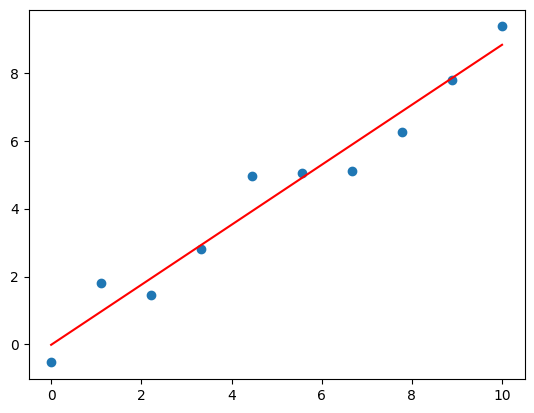

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def regression_lineal(x, y):
    """
    Realiza la regresión lineal para los puntos dados.

    Args:
        x: Vector de características.
        y: Vector de valores esperados.

    Returns:
        Parámetros de la regresión lineal.
    """

    # Creamos la matriz de características.
    X = np.vstack([np.ones(x.shape[0]), x]).T

    # Calculamos la matriz de parámetros.
    theta = np.linalg.inv(X.T @ X) @ X.T @ y

    return theta


# Generamos los puntos.
N = 10
x1 = np.linspace(0, 10, N)
noise = 2 * np.random.random(N) - 1
y = 0.9 * x1 + noise

# Realizamos la regresión lineal.
theta = regression_lineal(x1, y)

# Imprimimos los parámetros de la regresión lineal.
print(theta)

# Visualizamos la recta de regresión.
plt.plot(x1, theta[0] + theta[1] * x1, 'r')
plt.scatter(x1, y)
plt.show()
